<a href="https://colab.research.google.com/github/manikanta741/Analysis-Of-Super-Store-Data/blob/main/Analysis%20Of%20Super%20Store%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of dataset: (51290, 24)

Preview:
    Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Cat

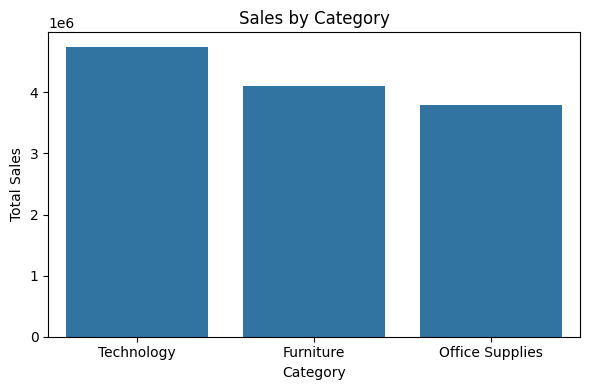


Monthly Sales Trend:
 Order Date
2011-01-01     98898.48886
2011-02-01     91152.15698
2011-03-01    145729.36736
2011-04-01    116915.76418
2011-05-01    146747.83610
Freq: MS, Name: Sales, dtype: float64


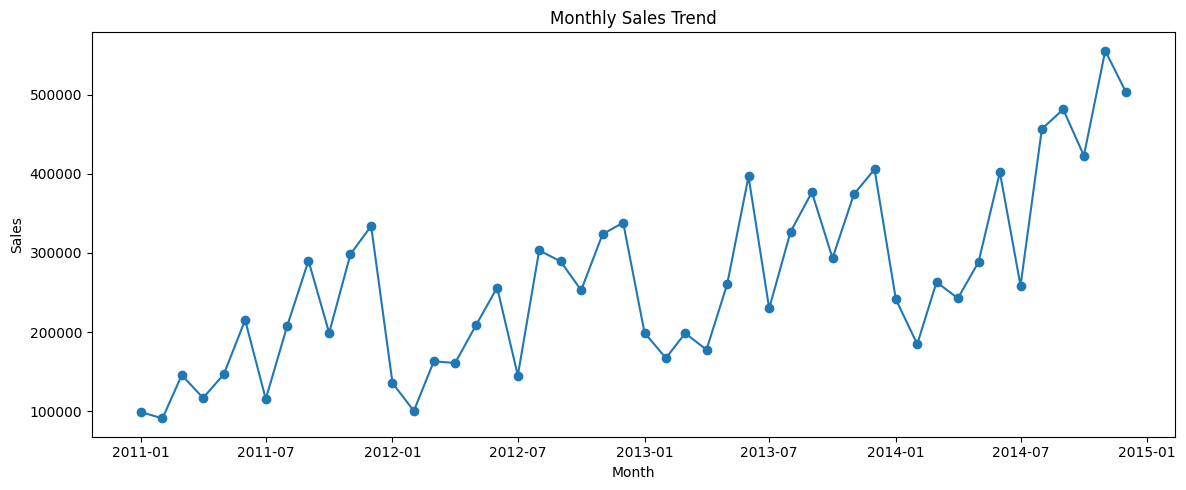


Top 10 Products:
 Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64


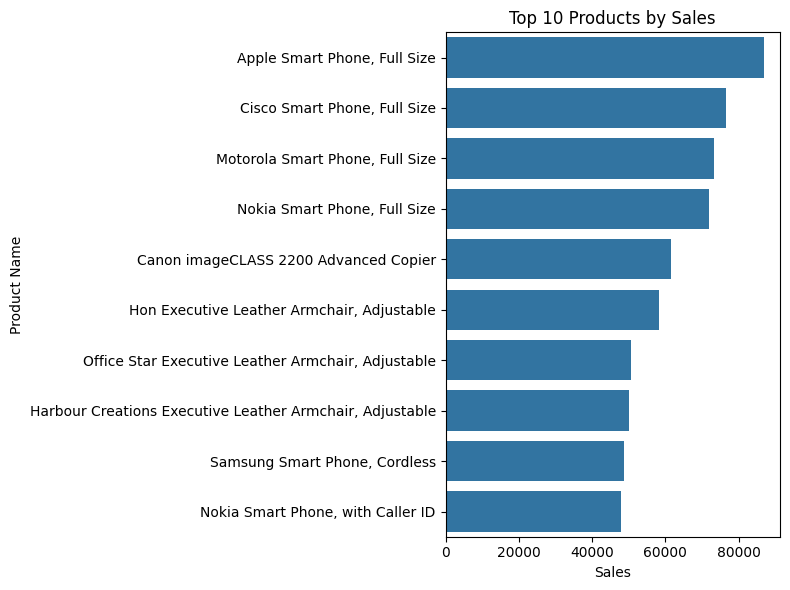


Sales Share by Segment:
 Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64


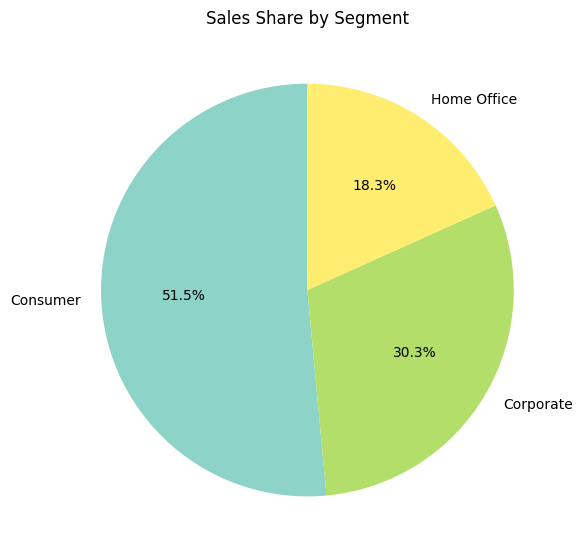


Average Order Value by Segment:
 Segment
Consumer       245.416299
Corporate      247.890176
Home Office    247.228403
Name: Sales, dtype: float64


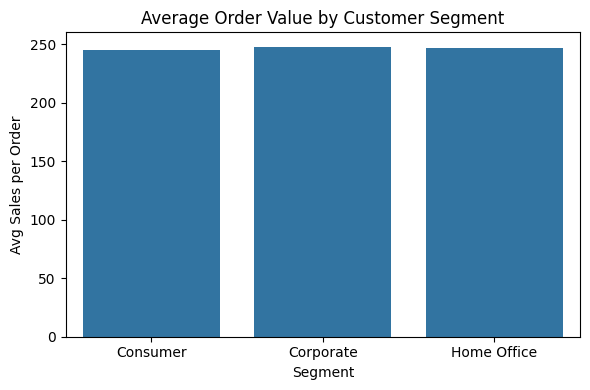


Scatter Plot: Sales vs Profit


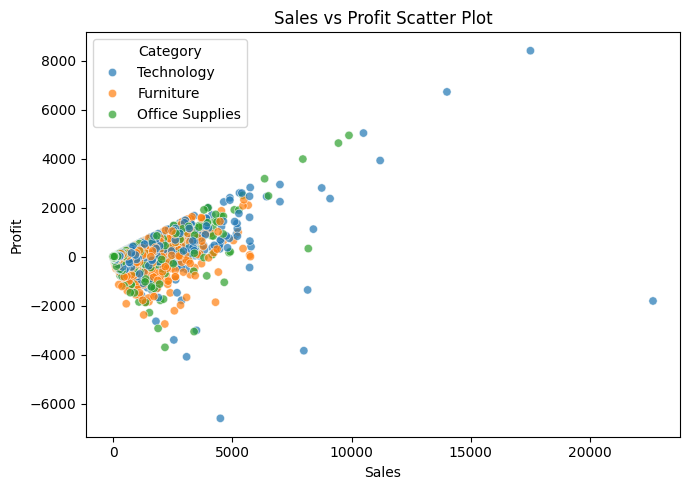


Top 10 Profitable Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: Profit, dtype: float64


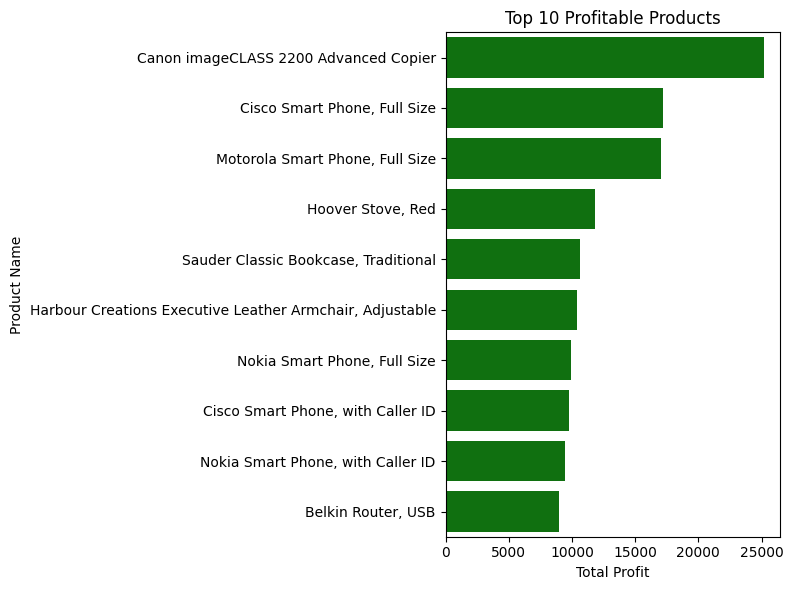


Profit by Category:
 Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64


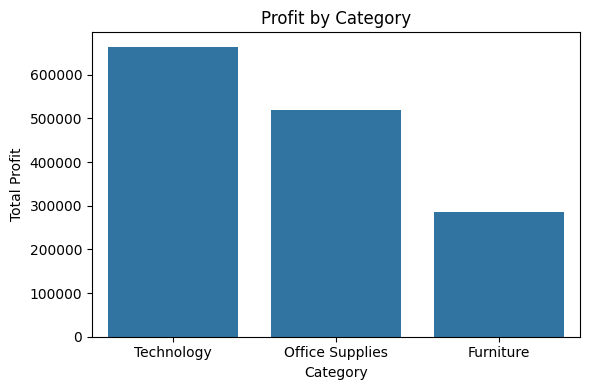


Forecasting MAPE: 28.18% (~ 71.82% accuracy)


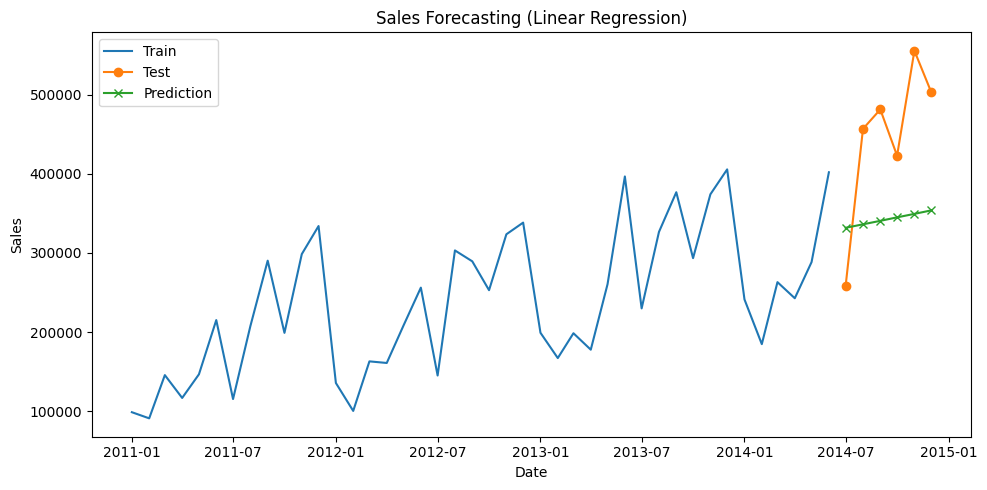


Correlation Matrix:
           Discount  Quantity    Profit     Sales
Discount  1.000000 -0.019875 -0.316490 -0.086722
Quantity -0.019875  1.000000  0.104365  0.313577
Profit   -0.316490  0.104365  1.000000  0.484918
Sales    -0.086722  0.313577  0.484918  1.000000


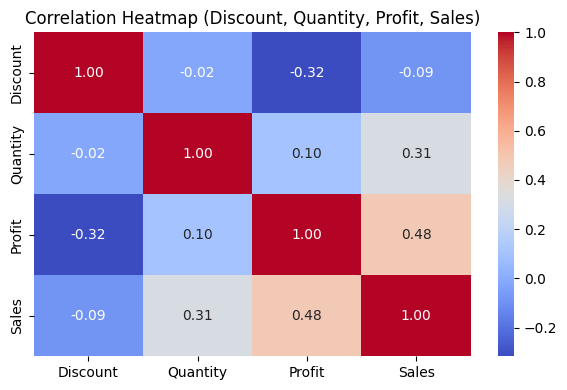


Fast-moving Products (Top 20% Sales):
 Product Name
3D Systems Cube Printer, 2nd Generation, Magenta    14299.8900
Acco Binding Machine, Clear                          5871.0455
Acco Binding Machine, Recycled                       5563.4600
Adjustable Depth Letter/Legal Cart                   7730.1960
Advantus Frame, Black                                4881.8720
Name: Sales, dtype: float64

Slow-moving Products (Bottom 20% Sales):
 Product Name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10- 4 1/8" x 9 1/2" Security-Tint Envelopes            146.688
#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes     176.288
Name: Sales, dtype: float64


In [9]:
# ------------------------------------------------------------
# Project Title: Analysis of Global Super Store Data
# Tools: Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


# 1. Load Dataset
superstore = pd.read_csv("/content/Super Store.csv", encoding="latin1")
print("Shape of dataset:", superstore.shape)
print("\nPreview:\n", superstore.head())


# 2. Data Preprocessing
print("\nMissing values:\n", superstore.isnull().sum())
print("\nDuplicate rows:", superstore.duplicated().sum())

# Drop duplicates
superstore = superstore.drop_duplicates()

# Convert date columns
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], dayfirst=True, errors='coerce')
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], dayfirst=True, errors='coerce')

# Feature Engineering
superstore['Profit_Margin'] = superstore['Profit'] / superstore['Sales']
superstore['Sales_per_Customer'] = superstore['Sales'] / superstore['Quantity']

# Extract time features
superstore['Year'] = superstore['Order Date'].dt.year
superstore['Month'] = superstore['Order Date'].dt.month_name()


# 3. Exploratory Data Analysis (EDA)

# Sales by Category
sales_by_cat = superstore.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Category:\n", sales_by_cat)

plt.figure(figsize=(6,4))
sns.barplot(x=sales_by_cat.index, y=sales_by_cat.values)
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Monthly Sales Trend
monthly_sales = superstore.groupby(superstore['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
print("\nMonthly Sales Trend:\n", monthly_sales.head())

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Top Products by Sales
top_products = superstore.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products:\n", top_products)

plt.figure(figsize=(8,6))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Sales Share by Segment (Pie Chart)
sales_share = superstore.groupby("Segment")["Sales"].sum()
print("\nSales Share by Segment:\n", sales_share)

plt.figure(figsize=(6,6))
sales_share.plot(kind="pie", autopct='%1.1f%%', startangle=90, colormap="Set3")
plt.title("Sales Share by Segment")
plt.ylabel("")
plt.tight_layout()
plt.show()


# 4. Customer Analysis

# Customer Purchasing Patterns (Average Order Value by Segment)
customer_patterns = superstore.groupby('Segment')['Sales'].mean()
print("\nAverage Order Value by Segment:\n", customer_patterns)

plt.figure(figsize=(6,4))
sns.barplot(x=customer_patterns.index, y=customer_patterns.values)
plt.title("Average Order Value by Customer Segment")
plt.ylabel("Avg Sales per Order")
plt.tight_layout()
plt.show()

# Scatter Plot: Sales vs Profit
print("\nScatter Plot: Sales vs Profit")
plt.figure(figsize=(7,5))
sns.scatterplot(x="Sales", y="Profit", data=superstore, hue="Category", alpha=0.7)
plt.title("Sales vs Profit Scatter Plot")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


# 5. Product Performance Analysis

# Top 10 Profitable Products
top_profitable = superstore.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Profitable Products:\n", top_profitable)

plt.figure(figsize=(8,6))
sns.barplot(y=top_profitable.index, x=top_profitable.values, color="green")  # use color instead of palette
plt.title("Top 10 Profitable Products")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Profitability by Category
profit_by_cat = superstore.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("\nProfit by Category:\n", profit_by_cat)

plt.figure(figsize=(6,4))
sns.barplot(x=profit_by_cat.index, y=profit_by_cat.values)
plt.title("Profit by Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()



# 6. Sales Forecasting (ML Model)

monthly_df = monthly_sales.reset_index()
monthly_df.columns = ['Order Date', 'Sales']
monthly_df['t'] = np.arange(len(monthly_df))

# Train/Test Split (last 6 months as test)
train = monthly_df.iloc[:-6]
test = monthly_df.iloc[-6:]

# Linear Regression Model
lr = LinearRegression()
lr.fit(train[['t']], train['Sales'])
pred = lr.predict(test[['t']])

# Accuracy
mape = mean_absolute_percentage_error(test['Sales'], pred) * 100
print(f"\nForecasting MAPE: {mape:.2f}% (~ {100 - mape:.2f}% accuracy)")

# Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(train['Order Date'], train['Sales'], label="Train")
plt.plot(test['Order Date'], test['Sales'], label="Test", marker='o')
plt.plot(test['Order Date'], pred, label="Prediction", marker='x')
plt.legend()
plt.title("Sales Forecasting (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Correlation Heatmap (Discount, Quantity, Profit, Sales)
corr = superstore[['Discount','Quantity','Profit','Sales']].corr()
print("\nCorrelation Matrix:\n", corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Discount, Quantity, Profit, Sales)")
plt.tight_layout()
plt.show()


# 7. Inventory Optimization (Fast vs Slow Movers)
product_sales = superstore.groupby('Product Name')['Sales'].sum()

fast_movers = product_sales[product_sales >= product_sales.quantile(0.8)]
slow_movers = product_sales[product_sales <= product_sales.quantile(0.2)]

print("\nFast-moving Products (Top 20% Sales):\n", fast_movers.head())
print("\nSlow-moving Products (Bottom 20% Sales):\n", slow_movers.head())
